In [1]:
from matplotlib.colors import SymLogNorm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
from scipy import optimize
from astropy.coordinates.sky_coordinate import SkyCoord
import astropy.units as u
from astropy.cosmology import Planck15 as cosmo
from astropy import constants as const
from astropy.wcs import WCS
from ClusterModel import model
from ClusterModel import model_modpar
from ClusterModel import model_tools

# Modify plotting parameters
dict_base = {'font.size':        16,
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15,
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

In [2]:
clust = model.Cluster(name='Perseus', 
                      redshift=0.0179, M500=7e14*u.Msun, 
                      cosmology=cosmo, silent=True, 
                      output_dir='/home/astrogamma/Project/Output/TestClusterModel')


clust.Npt_per_decade_integ = 20


In [3]:
prof = pandas.read_csv('Perseus_radio_profile.txt', header=None, skiprows=1, index_col=False,
                     names=['r', 'logF', 'err_m', 'err_p'])
spec = pandas.read_csv('Perseus_radio_spectrum.txt', header=None, skiprows=1, index_col=False,
                     names=['logNu', 'logF', 'err'])

In [11]:
prof

,r,logF,err_m,err_p
0,14.035750,1.166074,0.035423,0.031474
1,28.156246,0.869864,0.316204,0.023728
2,39.071799,0.565696,0.699594,0.027676
3,42.567272,0.360220,0.509855,0.169964
4,53.464952,0.143008,0.414990,0.023715
5,67.827232,-0.129482,0.324085,0.027648
6,81.913604,-0.259685,0.486156,0.102803
7,92.802347,-0.433419,0.719345,0.154170
8,110.622727,-0.729568,0.454560,0.403169
9,128.444732,-1.033622,0.237145,0.616615


In [10]:
spec

,logNu,logF,err
0,8.510191,1.242363,0.122200
1,8.783666,0.879837,0.089613
2,9.142779,0.476578,0.057026


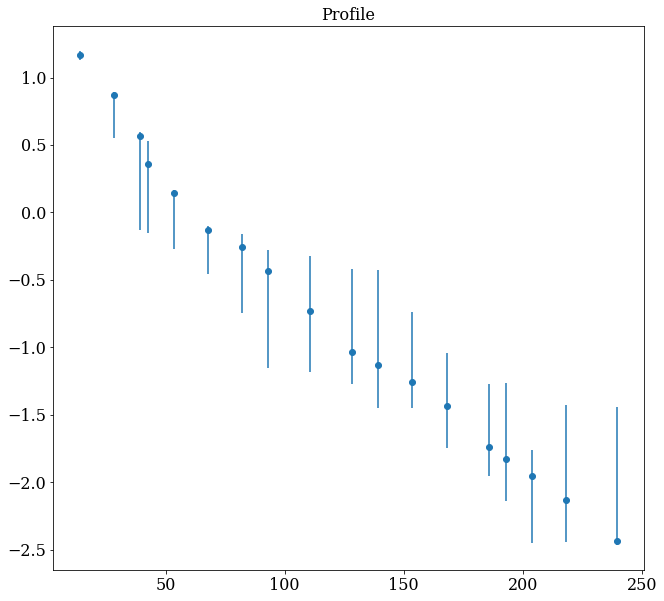

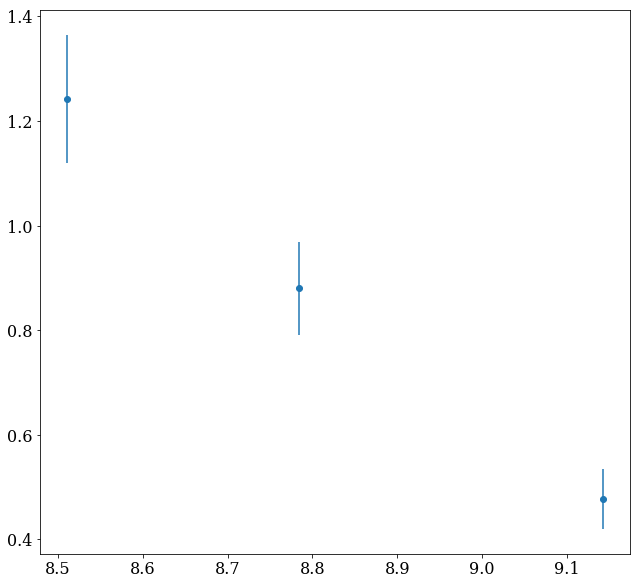

In [5]:



plt.figure(figsize=(10,10))
plt.errorbar(prof['r'].values, prof['logF'].values, marker='o', linestyle='', yerr=[prof['err_m'].values ,prof['err_p'].values])
plt.title("Profile")
plt.show()

plt.figure(figsize=(10,10))
plt.errorbar(spec['logNu'].values, spec['logF'].values, marker='o', linestyle='', yerr=spec['err'].values)
plt.title('Spectrum')
plt.show()

## Spectrum

In [12]:
N = spec['logNu'].values*u.Hz
F =  spec['logF'].values*u.Jy
Ferr = spec['err'].values*u.Jy

In [ ]:
%%time

def syncfitPrimary(x,a, ind):
    clust.X_crp_E = {'X':0, 'R_norm': clust.R500}
    clust.X_cre1_E = {'X':a, 'R_norm': clust.R500}
    clust.spectrum_cre1_model = {'name':'PowerLaw', 'Index':ind }
    return clust.get_synchrotron_spectrum(x*u.GHz)[1].to_value('Jy')


params1, params_covariance = optimize.curve_fit(syncfitPrimary, N.to_value('Hz'), F.to_value('Jy'), 
                                                sigma = Ferr.to_value('Jy'),
                                               p0=[0.01, 3])

print "Primary Electron Parameters: ", (params1)

In [ ]:
plt.figure(figsize=(15,10))
plt.errorbar(spec['logNu'].values, spec['logF'].values, marker='o', linestyle='', yerr=spec['err'].values)
## Plot Primary Electron version
plt.loglog(dat_freq, syncfitPrimary(dat_freq.to_value('GHz'), params1[0],params1[1]),
         label='Primary Electron Population Case')


In [ ]:
%%time

def syncfitSecondary(x,a, ind):
    clust.X_crp_E = {'X':a, 'R_norm': clust.R500}
    clust.X_cre1_E = {'X':0, 'R_norm': clust.R500}
    clust.spectrum_crp_model = {'name':'PowerLaw', 'Index':ind }
    return clust.get_synchrotron_spectrum(x*u.GHz)[1].to_value('Jy')

params2, params_covariance = optimize.curve_fit(syncfitSecondary, rd.to_value('kpc'), F.to_value('Jy'), 
                                                sigma = Ferr.to_value('Jy'),
                                               p0=[0.01, 3])


print "Secondary electron parameters: ",(params2)

## Profi